In [2]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

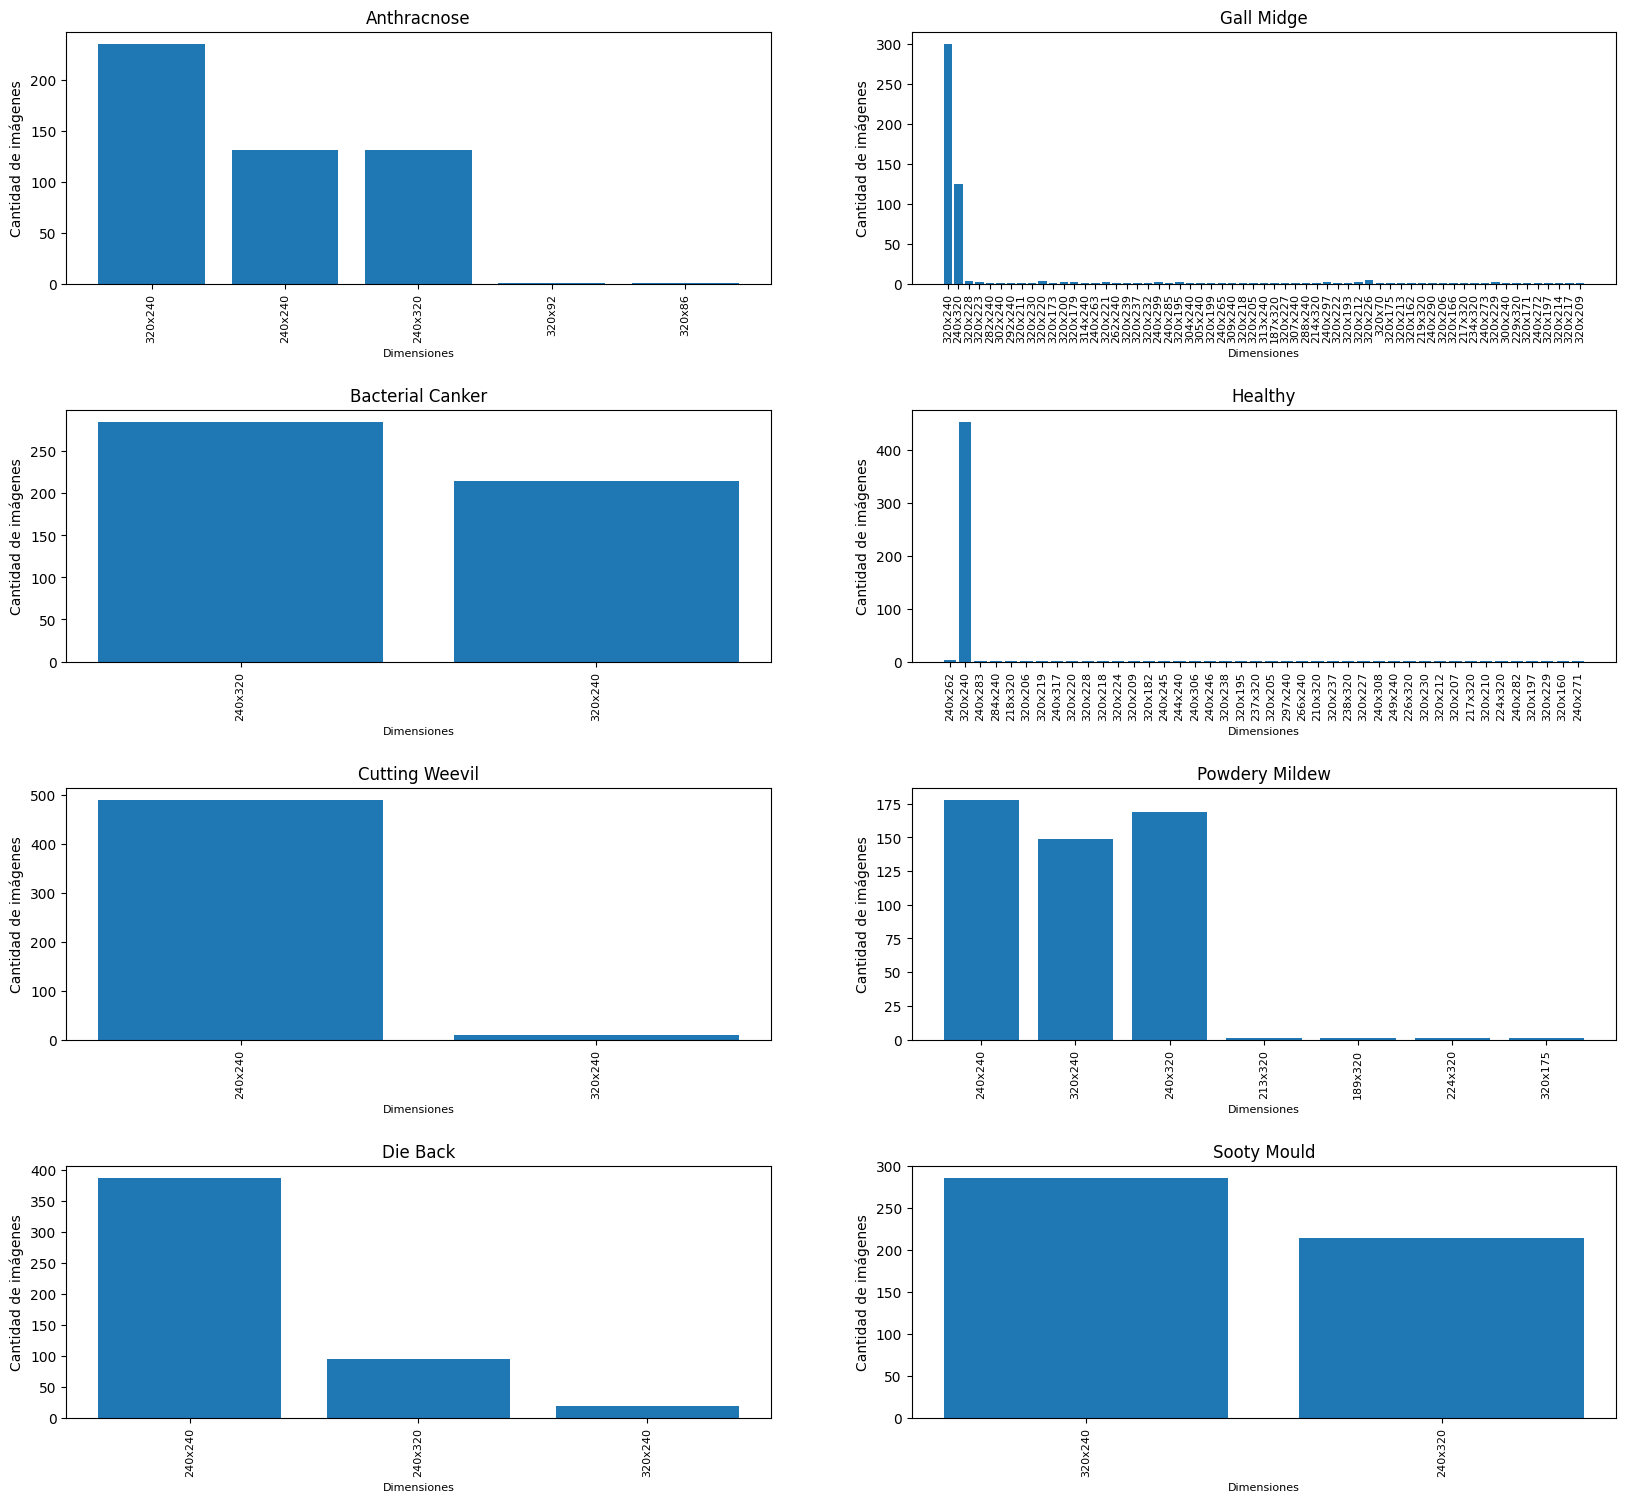

In [ ]:
def get_image_dimensions(image_folder):
    image_dimensions = []
    for filename in os.listdir(image_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(image_folder, filename)
            with open(image_path, 'rb') as img_file:
                img = plt.imread(img_file)
                height, width, _ = img.shape
                image_dimensions.append((width, height))
    return image_dimensions

def plot_image_dimensions_distribution(image_dimensions, folder_name, ax):
    dimension_counts = Counter(image_dimensions)
    dimensions, counts = zip(*dimension_counts.items())

    ax.bar(range(len(dimensions)), counts, tick_label=[f"{dim[0]}x{dim[1]}" for dim in dimensions])
    ax.set_title(folder_name)
    ax.set_xlabel('Dimensiones', fontsize=8)
    ax.set_ylabel('Cantidad de imágenes')
    ax.tick_params(axis='x', rotation=90, labelsize=8)

# Lista de carpetas
folders = [
    "/content/drive/MyDrive/Computer_Vision/mango_leaf_disease/Anthracnose",
    "/content/drive/MyDrive/Computer_Vision/mango_leaf_disease/Bacterial Canker",
    "/content/drive/MyDrive/Computer_Vision/mango_leaf_disease/Cutting Weevil",
    "/content/drive/MyDrive/Computer_Vision/mango_leaf_disease/Die Back",
    "/content/drive/MyDrive/Computer_Vision/mango_leaf_disease/Gall Midge",
    "/content/drive/MyDrive/Computer_Vision/mango_leaf_disease/Healthy",
    "/content/drive/MyDrive/Computer_Vision/mango_leaf_disease/Powdery Mildew",
    "/content/drive/MyDrive/Computer_Vision/mango_leaf_disease/Sooty Mould"
]

# Crear subplots
fig, axs = plt.subplots(4, 2, figsize=(20, 18))
fig.subplots_adjust(hspace=0.5)

# Procesar cada carpeta y graficar
for i, folder in enumerate(folders):
    image_dimensions = get_image_dimensions(folder)
    folder_name = os.path.basename(folder)
    plot_image_dimensions_distribution(image_dimensions, folder_name, axs[i%4, i//4])

plt.show()

In [ ]:
# Directorio principal original
main_folder_original = '/content/drive/MyDrive/Computer_Vision/mango_leaf_disease'

# Nuevo directorio principal para las imágenes redimensionadas
main_folder_resized = '/content/drive/MyDrive/Computer_Vision/mango_leaf_disease_resize'

# Dimensión deseada para las imágenes
target_size = (320, 320)  # Dimensión deseada

# Crear el nuevo directorio principal
os.makedirs(main_folder_resized, exist_ok=True)

# Iterar sobre cada carpeta en el directorio principal original
for folder_name in os.listdir(main_folder_original):
    folder_path_original = os.path.join(main_folder_original, folder_name)

    # Verificar si el elemento es una carpeta y no un archivo
    if os.path.isdir(folder_path_original):
        print(f"Procesando imágenes en el directorio: {folder_name}")

        # Crear un nuevo directorio para las imágenes redimensionadas
        folder_path_resized = os.path.join(main_folder_resized, folder_name)
        os.makedirs(folder_path_resized, exist_ok=True)

        # Iterar sobre todas las imágenes en la carpeta actual
        for filename in os.listdir(folder_path_original):
            if filename.endswith(".jpg") or filename.endswith(".png"):  # Filtrar solo imágenes
                # Cargar la imagen
                img_path = os.path.join(folder_path_original, filename)
                img = Image.open(img_path)

                # Redimensionar la imagen
                img_resized = img.resize(target_size, Image.LANCZOS)

                # Guardar la imagen redimensionada en la carpeta nueva
                resized_img_path = os.path.join(folder_path_resized, filename)
                img_resized.save(resized_img_path)

        print(f"Imágenes en el directorio {folder_name} redimensionadas y guardadas en {folder_path_resized}")

Procesando imágenes en el directorio: Cutting Weevil
Imágenes en el directorio Cutting Weevil redimensionadas y guardadas en /content/drive/MyDrive/Computer_Vision/mango_leaf_disease_resize/Cutting Weevil
Procesando imágenes en el directorio: Bacterial Canker
Imágenes en el directorio Bacterial Canker redimensionadas y guardadas en /content/drive/MyDrive/Computer_Vision/mango_leaf_disease_resize/Bacterial Canker
Procesando imágenes en el directorio: Anthracnose
Imágenes en el directorio Anthracnose redimensionadas y guardadas en /content/drive/MyDrive/Computer_Vision/mango_leaf_disease_resize/Anthracnose
Procesando imágenes en el directorio: Die Back
Imágenes en el directorio Die Back redimensionadas y guardadas en /content/drive/MyDrive/Computer_Vision/mango_leaf_disease_resize/Die Back
Procesando imágenes en el directorio: Gall Midge
Imágenes en el directorio Gall Midge redimensionadas y guardadas en /content/drive/MyDrive/Computer_Vision/mango_leaf_disease_resize/Gall Midge
Procesan

Folder 'Cutting Weevil' asignado como clase 0


100%|██████████| 500/500 [00:43<00:00, 11.49it/s]


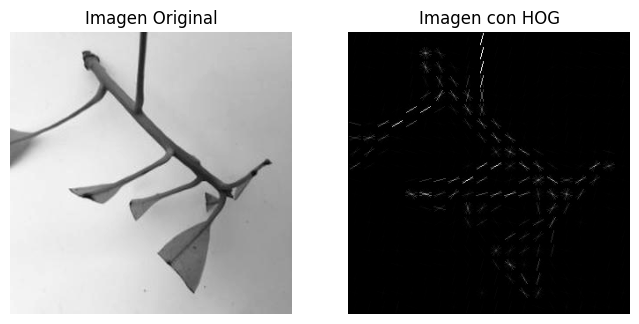

Folder 'Bacterial Canker' asignado como clase 1


100%|██████████| 500/500 [00:52<00:00,  9.51it/s]


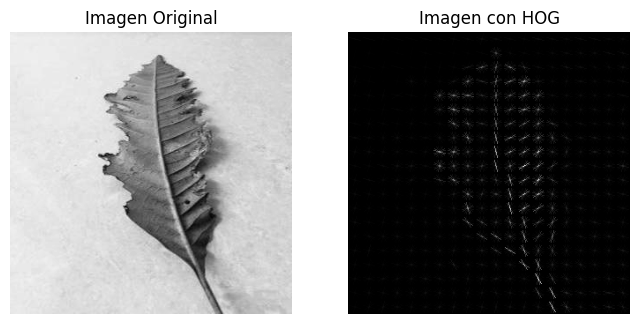

Folder 'Anthracnose' asignado como clase 2


100%|██████████| 500/500 [00:43<00:00, 11.43it/s]


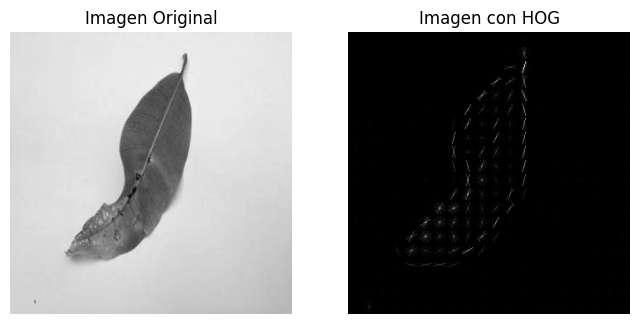

Folder 'Die Back' asignado como clase 3


100%|██████████| 500/500 [00:46<00:00, 10.80it/s]


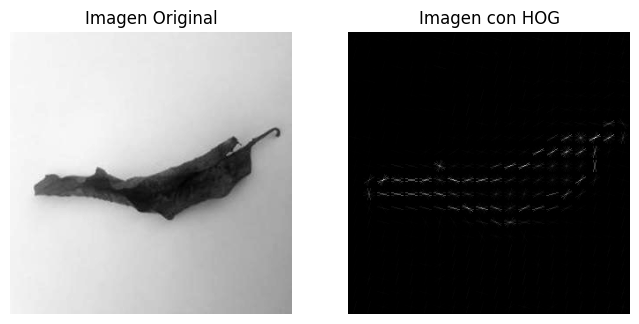

Folder 'Gall Midge' asignado como clase 4


100%|██████████| 500/500 [00:44<00:00, 11.24it/s]


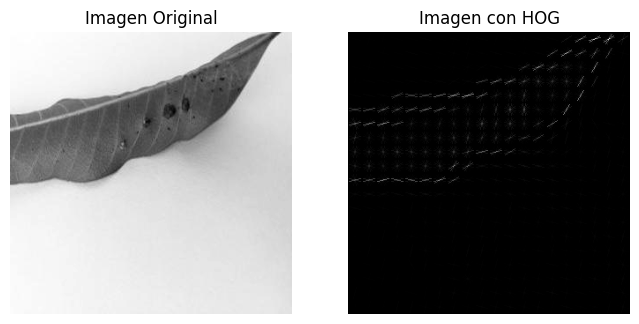

Folder 'Healthy' asignado como clase 5


100%|██████████| 500/500 [00:44<00:00, 11.23it/s]


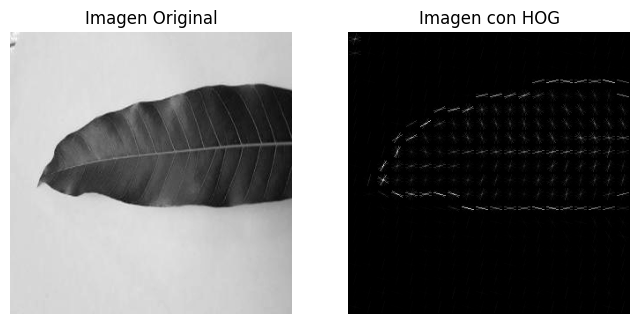

Folder 'Powdery Mildew' asignado como clase 6


100%|██████████| 500/500 [00:44<00:00, 11.19it/s]


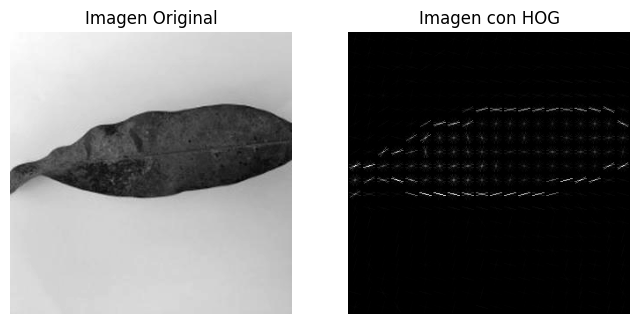

Folder 'Sooty Mould' asignado como clase 7


100%|██████████| 500/500 [00:47<00:00, 10.54it/s]


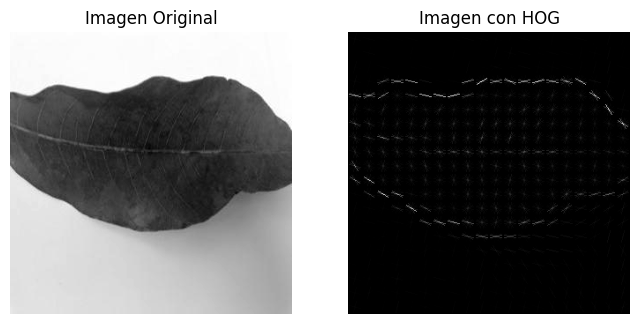

In [ ]:
# Directorio base
base_dir = '/content/drive/MyDrive/Computer_Vision/mango_leaf_disease_resize'

# Función para calcular el HOG de una imagen
def calculate_hog(image):
    # Calcula el HOG
    hog_features, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                          cells_per_block=(1, 1), visualize=True)
    return hog_features, hog_image

# Lista para almacenar los datos
data = []

# Diccionario para mapear nombres de carpeta a números
folder_mapping = {}

# Itera sobre cada carpeta
for class_label, folder_name in enumerate(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.isdir(folder_path):
        # Asigna un número a la carpeta y guarda en el diccionario
        folder_mapping[folder_name] = class_label
        print(f"Folder '{folder_name}' asignado como clase {class_label}")

        # Itera sobre cada imagen en la carpeta
        for img_name in tqdm(os.listdir(folder_path)):
            img_path = os.path.join(folder_path, img_name)
            if os.path.isfile(img_path):
                # Lee la imagen
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                # Calcula el HOG
                hog_features, _ = calculate_hog(img)
                # Agrega los datos a la lista
                data.append([img_name, folder_name, class_label] + hog_features.tolist())

        # Selecciona una imagen aleatoria
        random_img_name = random.choice(os.listdir(folder_path))
        random_img_path = os.path.join(folder_path, random_img_name)

        # Lee la imagen aleatoria
        random_img = cv2.imread(random_img_path, cv2.IMREAD_GRAYSCALE)

        # Calcula el HOG y la imagen HOG de la imagen aleatoria
        hog_features, hog_image = calculate_hog(random_img)

        # Visualiza la imagen original y la imagen HOG
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(random_img, cmap='gray')
        plt.title('Imagen Original')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(hog_image, cmap='gray')
        plt.title('Imagen con HOG')
        plt.axis('off')
        plt.show()

# Crea el DataFrame
columns = ['filename', 'folder', 'class'] + [f'hog_{i}' for i in range(len(data[0]) - 3)]
df = pd.DataFrame(data, columns=columns)

# Guarda el DataFrame en un archivo CSV
df.to_csv('/content/drive/MyDrive/Computer_Vision/mango_leaf_disease_resize/hog_features_resized.csv', index=False)

In [13]:
# Mapeo de carpetas a clases
print("Mapeo de carpetas a clases:\n")
for folder_name, class_label in folder_mapping.items():
    print(f"'{folder_name}' -> Clase {class_label}")

Mapeo de carpetas a clases:

Cutting Weevil -> Clase 0
Bacterial Canker -> Clase 1
Anthracnose -> Clase 2
Die Back -> Clase 3
Gall Midge -> Clase 4
Healthy -> Clase 5
Powdery Mildew -> Clase 6
Sooty Mould -> Clase 7


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Computer_Vision/mango_leaf_disease_resize/hog_features_resized.csv")

# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns=["filename", "folder", "class"])
y = data["class"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression(multi_class='ovr', max_iter=5000)
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Pecisión general del modelo (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.77125


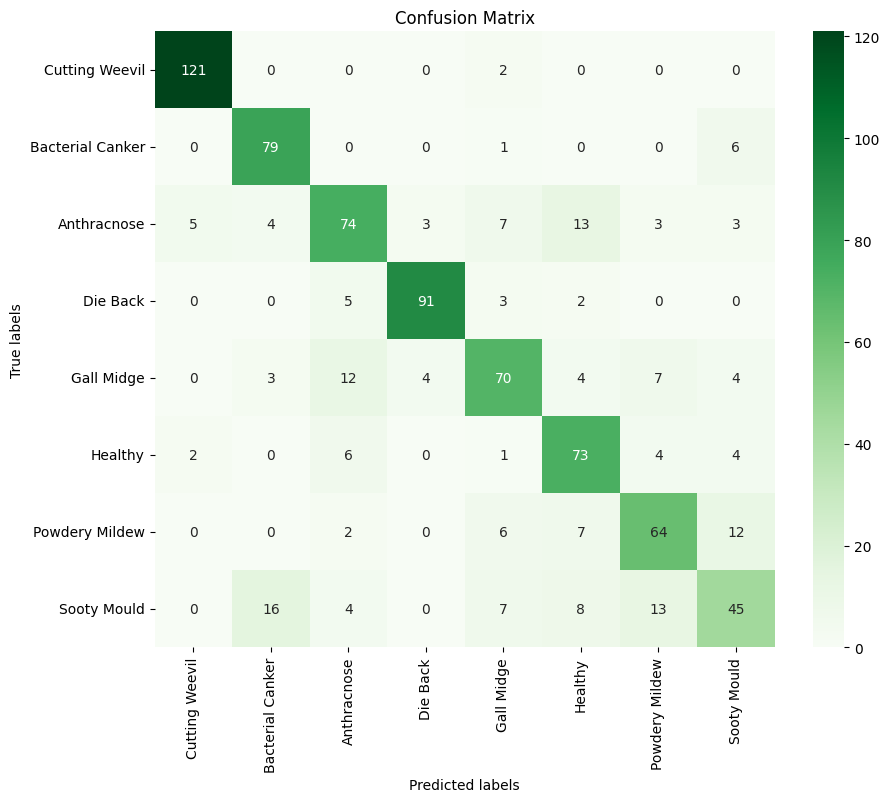

In [8]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Greens", fmt="d",
            xticklabels=['Cutting Weevil', 'Bacterial Canker', 'Anthracnose', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould'],
            yticklabels=['Cutting Weevil', 'Bacterial Canker', 'Anthracnose', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
class_names = ['Cutting Weevil', 'Bacterial Canker', 'Anthracnose', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']
class_report = classification_report(y_test, y_pred, target_names=class_names)
print("Reporte de clasificación:\n")
print(class_report)

Reporte de clasificación:

                  precision    recall  f1-score   support

  Cutting Weevil       0.95      0.98      0.96       123
Bacterial Canker       0.77      0.92      0.84        86
     Anthracnose       0.72      0.66      0.69       112
        Die Back       0.93      0.90      0.91       101
      Gall Midge       0.72      0.67      0.70       104
         Healthy       0.68      0.81      0.74        90
  Powdery Mildew       0.70      0.70      0.70        91
     Sooty Mould       0.61      0.48      0.54        93

        accuracy                           0.77       800
       macro avg       0.76      0.77      0.76       800
    weighted avg       0.77      0.77      0.77       800

